In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib
import tifffile
import skimage
from statannotations.Annotator import Annotator
sns.set_theme(style='darkgrid', palette='colorblind')
plt.rcParams['figure.figsize'] = (5, 10)
sns.set(font_scale=2)

In [45]:
data = pd.read_csv('/lab/processed-data/221214_EA_GenTONIK_IEG/2022-12-18_nuclei_objects_Emin/2022-12-18_nuclei_objects_Image.csv')
pm = pd.read_csv('/lab/raw-data/221214_EA_GenTONIK_IEG/platemap.csv')

In [46]:
wells = pm.query('stain=="IEG"')
data.index = data['FileName_cfos_pre_illum']
data = data.reindex(wells['filename'].values)
data['condition_treatment'] = wells['condition_treatment'].values
data['condition_stimulation'] = wells['condition_stimulation'].values

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Thur vs. Fri: Mann-Whitney-Wilcoxon test two-sided, P_val:6.477e-01 U_stat=6.305e+02
Thur vs. Sat: Mann-Whitney-Wilcoxon test two-sided, P_val:4.690e-02 U_stat=2.180e+03
Sun vs. Fri: Mann-Whitney-Wilcoxon test two-sided, P_val:2.680e-02 U_stat=9.605e+02


(<matplotlib.axes._subplots.AxesSubplot at 0x7fa6955675e0>,
  <statannotations.Annotation.Annotation at 0x7fa69555fc70>])

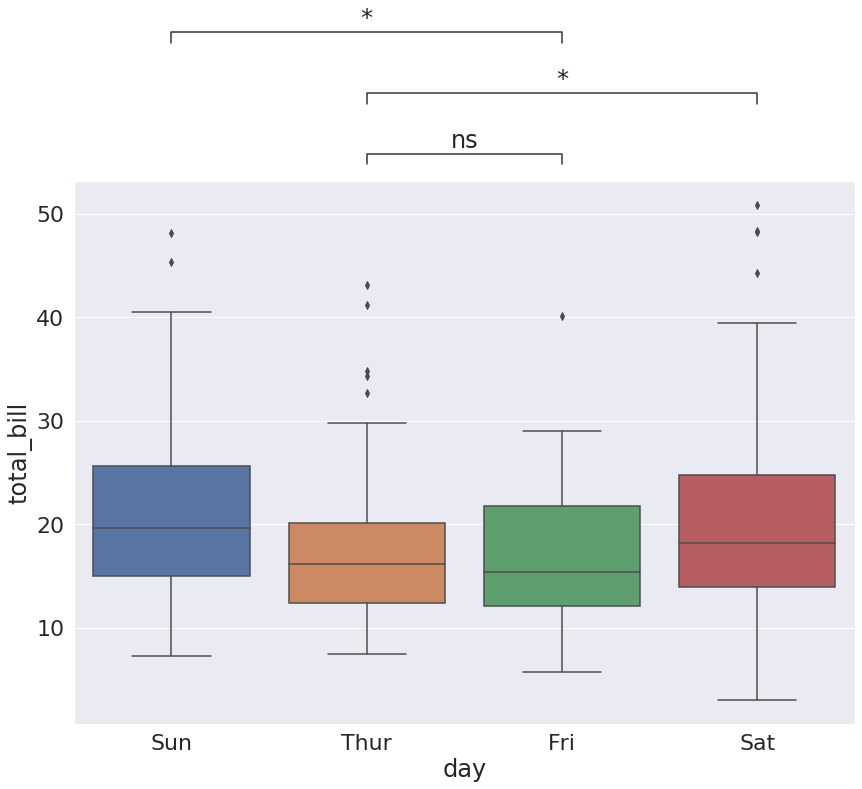

In [61]:
import seaborn as sns

from statannotations.Annotator import Annotator

df = sns.load_dataset("tips")
x = "day"
y = "total_bill"
order = ['Sun', 'Thur', 'Fri', 'Sat']

ax = sns.boxplot(data=df, x=x, y=y, order=order)

pairs=[("Thur", "Fri"), ("Thur", "Sat"), ("Fri", "Sun")]

annotator = Annotator(ax, pairs, data=df, x=x, y=y, order=order)
annotator.configure(test='Mann-Whitney', text_format='star', loc='outside')
annotator.apply_and_annotate()

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

GenTONIK_CTRL vs. GenTONIK_KCL: Mann-Whitney-Wilcoxon test two-sided, P_val:1.807e-01 U_stat=3.100e+01
No_Treatment_CTRL vs. No_Treatment_KCL: Mann-Whitney-Wilcoxon test two-sided, P_val:4.557e-01 U_stat=3.100e+01


(<matplotlib.axes._subplots.AxesSubplot at 0x7fa6950e9520>,
  <statannotations.Annotation.Annotation at 0x7fa69573a070>])

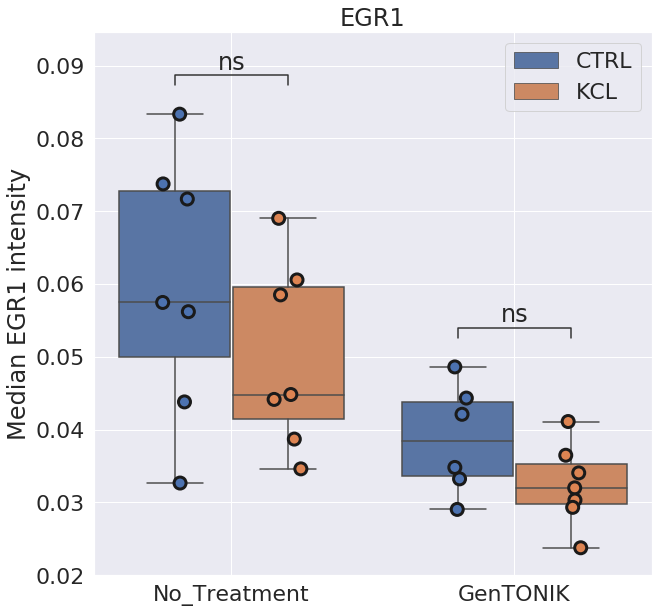

In [91]:
measurement = 'Median_nuclei_Intensity_MeanIntensity_egr1'
# sns.boxplot(data, x='condition_treatment', y=measurement)
order = ['No_Treatment', 'GenTONIK']
bplot = sns.boxplot(data, 
                    x='condition_treatment', 
                    y=measurement, 
                    hue='condition_stimulation', 
                    order=order)
sns.stripplot(data, 
              x='condition_treatment', 
              y=measurement, 
              hue='condition_stimulation', 
              dodge=True, 
              alpha=1, 
              edgecolor='k', 
              linewidth=3,
              size=12,
              order=order)
plt.title(measurement)
handles, labels = bplot.get_legend_handles_labels()
# specify just one legend
l = plt.legend(handles[0:2], labels[0:2])
plt.xlabel('')
plt.title('EGR1')
plt.ylabel('Median EGR1 intensity')
bplot.xaxis.grid(True)

pairs=[
  (("No_Treatment", "CTRL"), ("No_Treatment", "KCL")),
  (("GenTONIK", "CTRL"), ("GenTONIK", "KCL")),
  # (("No_Treatment", "CTRL"), ("GenTONIK", "CTRL")),
  # (("No_Treatment", "KCL"), ("GenTONIK", "KCL")),
  
  ]

annot = Annotator(bplot, pairs, data=data, x='condition_treatment', y=measurement, hue='condition_stimulation',  order=order)
annot.configure(test='Mann-Whitney', verbose=2)
annot.apply_test()
annot.annotate()

# annotator = Annotator(ax, pairs, data=data, x='condition_treatment', y=measurement, hue='condition_stimulation',  order=order)
# annotator.configure(test='Mann-Whitney', verbose=2)
# annotator.apply_and_annotate()

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

No_Treatment vs. GenTONIK: Mann-Whitney-Wilcoxon test two-sided, P_val:2.849e-01 U_stat=1.300e+02


/tmp/ipykernel_1883/3408939281.py:32: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.stripplot(data,


(<matplotlib.axes._subplots.AxesSubplot at 0x7fd14b8007c0>,
 [<statannotations.Annotation.Annotation at 0x7fd14b8a6a60>])

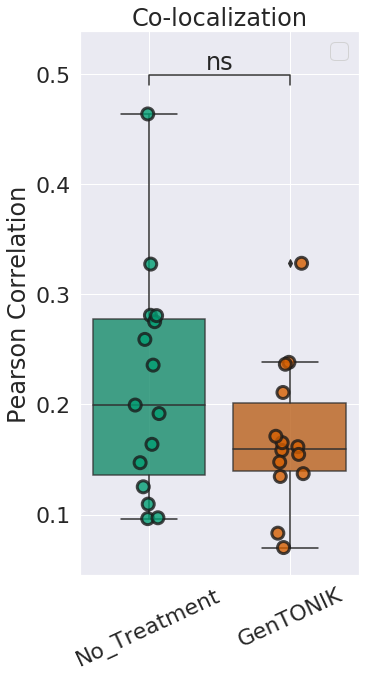

In [89]:
data = pd.read_csv('/lab/processed-data/221214_EA_GenTONIK_SM/2022-12-19_neurite_segment_Emin/2022-12-19_neurite_segment_Image.csv')
# data = pd.read_csv('/lab/processed-data/221214_EA_GenTONIK_IEG/2022-12-18_nuclei_objects_Emin/2022-12-18_nuclei_objects_Image.csv')
data = data.drop([8,26], axis=0)
pm = pd.read_csv('/lab/raw-data/221214_EA_GenTONIK_SM/platemap.csv')

wells = pm.query('stain=="SM"')
data.index = data['FileName_psd95_pre_illum']
# data.index = data['FileName_cfos_pre_illum']
data = data.reindex(wells['filename'].values)
data['condition_treatment'] = wells['condition_treatment'].values

pal = sns.color_palette("colorblind").as_hex()
pal[0] = pal[2]
pal[1] = pal[3]
measurement = 'Intensity_TotalIntensity_synapsin_masked'
measurement = 'Correlation_Correlation_psd95_masked_synapsin_masked'
# measurement = 'AreaOccupied_AreaOccupied_neurite_skeleton'
# measurement = 'Count_nuclei'
# data[measurement] = data[measurement] / data['Count_nuclei']
# data[measurement] = data[measurement] / data['AreaOccupied_AreaOccupied_neurite_skeleton']
# sns.boxplot(data, x='condition_treatment', y=measurement)
order = ['No_Treatment', 'GenTONIK']
bplot = sns.boxplot(data, 
                    x='condition_treatment', 
                    y=measurement, 
                    order=order,
                    palette=pal, 
                    boxprops=dict(alpha=0.8))
pal[2] = pal[1]
pal[1] = pal[0]
pal[0] = pal[2]
sns.stripplot(data, 
              x='condition_treatment', 
              y=measurement, 
              hue='condition_treatment',
              alpha=0.8, 
              edgecolor='k', 
              linewidth=3,
              size=12, 
              order=order, 
              palette=pal)
plt.title(measurement)
plt.xlabel('')
plt.xticks(rotation=25)
plt.title('Co-localization')
plt.ylabel('Pearson Correlation')
# plt.ylabel('Neurite Length / # cells')
# plt.legend(bbox_to_anchor=(1.8, 1), loc='upper right')
plt.legend([])
bplot.xaxis.grid(True)

pairs=[
  ("No_Treatment", "GenTONIK"),
  
  ]

annot = Annotator(bplot, pairs, data=data, x='condition_treatment', y=measurement, order=order)
annot.configure(test='Mann-Whitney', verbose=2)
annot.apply_test()
annot.annotate()
# plt.ylim([0,0.002])
# annotator = Annotator(ax, pairs, data=data, x='condition_treatment', y=measurement, hue='condition_stimulation',  order=order)
# annotator.configure(test='Mann-Whitney', verbose=2)
# annotator.apply_and_annotate()

In [8]:
data_dir = pathlib.Path('/lab/raw-data/221214_EA_GenTONIK_SM')
pm = pd.read_csv('/lab/raw-data/221214_EA_GenTONIK_SM/platemap.csv')
pm = pm.query('stain=="SM"')

img_dir = 'max_projections'
# img_dir = '2022-12-18_neurite_segment_Emin/neurite_mask'

img_stack = np.zeros((pm.shape[0], 1024, 1024))
img_stack = img_stack.astype('uint16')
for i_file, file in enumerate(pm['filename']):
    tif = skimage.io.imread(data_dir / img_dir / (file).replace('488', '488'))
    img_stack[i_file, :, :] = tif
# img_stack 
# tifffile.imwrite(data_dir / ('2022-12-18_neurite_segment_Emin_neurite_mask.tiff'), img_stack, metadata={'axes': 'ZYX'}, imagej=True, compression='lzw', dtype='uint16')
tifffile.imwrite(pathlib.Path('/lab/processed-data/221214_EA_GenTONIK_IEG') / ('max_projections_PSD-95.tiff'), img_stack, metadata={'axes': 'ZYX'}, imagej=True, compression='lzw', dtype='uint16')

In [52]:
data_dir = pathlib.Path('/lab/raw-data/221214_EA_GenTONIK_SM')
pm = pd.read_csv('/lab/raw-data/221214_EA_GenTONIK_SM/platemap.csv')
pm = pm.query('stain=="SM"')

img_dir = 'max_projections'
# img_dir = '2022-12-18_neurite_segment_Emin/neurite_mask'

img_stack = np.zeros((pm.shape[0], 1024, 1024))
img_stack = img_stack.astype('uint16')
for i_file, file in enumerate(pm['filename']):
    # tif = skimage.io.imread(data_dir / img_dir / (file).replace('488', '488'))
    # img_stack[i_file, :, :] = tif
    print(file)
# img_stack 
# tifffile.imwrite(data_dir / ('2022-12-18_neurite_segment_Emin_neurite_mask.tiff'), img_stack, metadata={'axes': 'ZYX'}, imagej=True, compression='lzw', dtype='uint16')
tifffile.imwrite(pathlib.Path('/lab/processed-data/221214_EA_GenTONIK_IEG') / ('max_projections_PSD-95.tiff'), img_stack, metadata={'axes': 'ZYX'}, imagej=True, compression='lzw', dtype='uint16')

221214_GT_SM_20x_SD-MaxIP_488 SD_B02.tif
221214_GT_SM_20x_SD-MaxIP_488 SD_B03.tif
221214_GT_SM_20x_SD-MaxIP_488 SD_B04.tif
221214_GT_SM_20x_SD-MaxIP_488 SD_B06.tif
221214_GT_SM_20x_SD-MaxIP_488 SD_B07.tif
221214_GT_SM_20x_SD-MaxIP_488 SD_B08.tif
221214_GT_SM_20x_SD-MaxIP_488 SD_B09.tif
221214_GT_SM_20x_SD-MaxIP_488 SD_B10.tif
221214_GT_SM_20x_SD-MaxIP_488 SD_B11.tif
221214_GT_SM_20x_SD-MaxIP_488 SD_C02.tif
221214_GT_SM_20x_SD-MaxIP_488 SD_C03.tif
221214_GT_SM_20x_SD-MaxIP_488 SD_C04.tif
221214_GT_SM_20x_SD-MaxIP_488 SD_C05.tif
221214_GT_SM_20x_SD-MaxIP_488 SD_C06.tif
221214_GT_SM_20x_SD-MaxIP_488 SD_C07.tif
221214_NT_SM_20x_SD-MaxIP_488 SD_B02.tif
221214_NT_SM_20x_SD-MaxIP_488 SD_B03.tif
221214_NT_SM_20x_SD-MaxIP_488 SD_B04.tif
221214_NT_SM_20x_SD-MaxIP_488 SD_B05.tif
221214_NT_SM_20x_SD-MaxIP_488 SD_B06.tif
221214_NT_SM_20x_SD-MaxIP_488 SD_B07.tif
221214_NT_SM_20x_SD-MaxIP_488 SD_B08.tif
221214_NT_SM_20x_SD-MaxIP_488 SD_B09.tif
221214_NT_SM_20x_SD-MaxIP_488 SD_B10.tif
221214_NT_SM_20x